In [333]:
# EE5053 - 2023_Present_Group_04

## Heart Failure Prediction Dataset
#### Group NO : 04
#### Students Name:
##### 3818 Amarasinghe W.L.S.K
##### 3827 Aralugaswaththa S.V.C.R.P 

### Import the packages

In [334]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import confusion_matrix
%matplotlib inline 

# Models for sklean 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import learning_curve

#Model Evaluation 
from sklearn.model_selection import train_test_split ,RandomizedSearchCV , GridSearchCV 
from sklearn.metrics import confusion_matrix , classification_report  , f1_score , recall_score , precision_score , RocCurveDisplay

### Import the data from csv

In [335]:
df = pd.read_csv("heart.csv")
df.shape 

(918, 12)

In [336]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [337]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

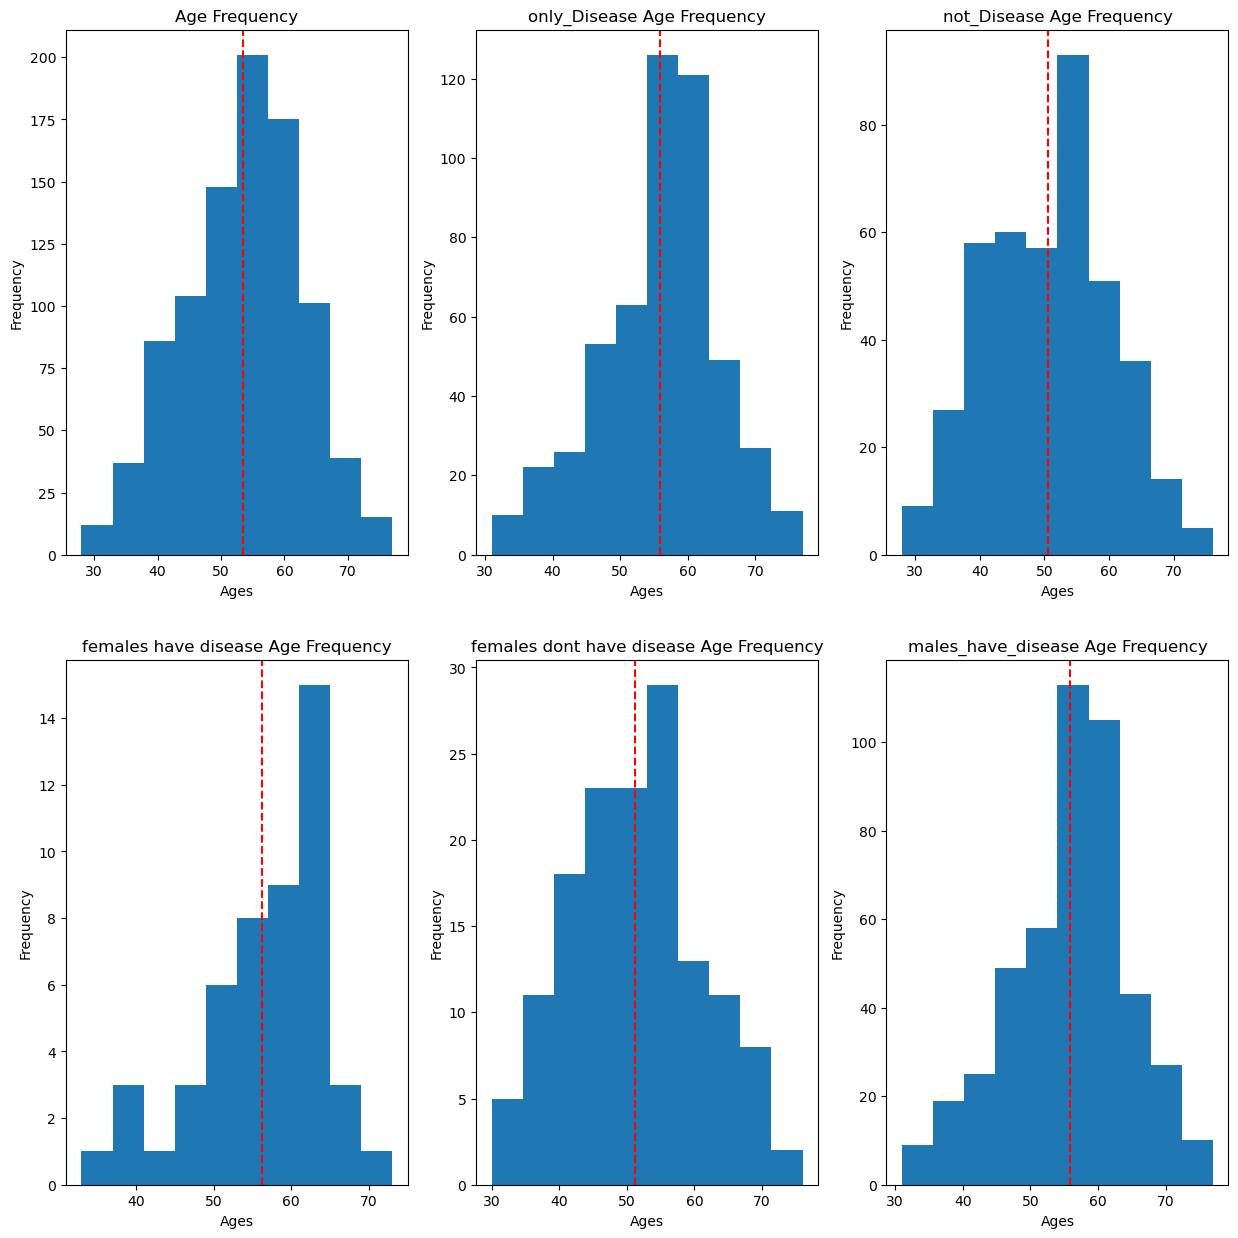

In [338]:
only_Disease = df[df["HeartDisease"] == 1]
not_Disease = df[df["HeartDisease"] == 0]

over_50_years = df[df["Age"] > 50]
over_50_disease = over_50_years[over_50_years["HeartDisease"] == 1]
over_50_not_disease = over_50_years[over_50_years["HeartDisease"] == 0]

younger_than_50 = df[df['Age'] < 50]
younger_50_disease = younger_than_50[younger_than_50["HeartDisease"] == 1]
younger_50_no_disease = younger_than_50[younger_than_50["HeartDisease"] == 0]


females = df[df['Sex'] == "F"]
females_have_disease = females[females["HeartDisease"] == 1]
females_dont_have_disease = females[females["HeartDisease"] == 0]


males = df[df['Sex'] == "M"]
males_have_disease = males[males["HeartDisease"] == 1]
males_dont_have_disease = males[males["HeartDisease"] == 0]


#Age plots

fig , ((ax1 , ax2 , ax3) , (ax4 , ax5 , ax6)) = plt.subplots(
nrows = 2 , ncols = 3 , figsize = (15 , 15)
)
fig_1 = ax1.hist(df["Age"])
ax1.set(title= "Age Frequency" , xlabel = 'Ages' , ylabel = "Frequency")
ax1.axvline(df["Age"].mean() , c = "red" , linestyle = "--" , label = "Mean Age")

fig_2 = ax2.hist(only_Disease["Age"])
ax2.set(title= "only_Disease Age Frequency" , xlabel = 'Ages' , ylabel = "Frequency")
ax2.axvline(only_Disease["Age"].mean() , c = "red" , linestyle = "--" , label = "Mean Age")


fig_3 = ax3.hist(not_Disease["Age"])
ax3.set(title= "not_Disease Age Frequency" , xlabel = 'Ages' , ylabel = "Frequency")
ax3.axvline(not_Disease["Age"].mean() , c = "red" , linestyle = "--" , label = "Mean Age")


fig_4 = ax4.hist(females_have_disease["Age"])
ax4.set(title= "females have disease Age Frequency" , xlabel = 'Ages' , ylabel = "Frequency")
ax4.axvline(females_have_disease["Age"].mean() , c = "red" , linestyle = "--" , label = "Mean Age")


fig_5 = ax5.hist(females_dont_have_disease["Age"])
ax5.set(title= "females dont have disease Age Frequency" , xlabel = 'Ages' , ylabel = "Frequency")
ax5.axvline(females_dont_have_disease["Age"].mean() , c = "red" , linestyle = "--" , label = "Mean Age")


fig_6 = ax6.hist(males_have_disease["Age"])
ax6.set(title= "males_have_disease Age Frequency" , xlabel = 'Ages' , ylabel = "Frequency")
ax6.axvline(males_have_disease["Age"].mean() , c = "red" , linestyle = "--" , label = "Mean Age")

# fig_7 = ax7.hist(males_dont_have_disease["Age"])
# ax7.set(title= "males_dont_have_disease Age Frequency" , xlabel = 'Ages' , ylabel = "Frequency")

In [339]:
df.MaxHR.value_counts()

MaxHR
150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: count, Length: 119, dtype: int64

In [340]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


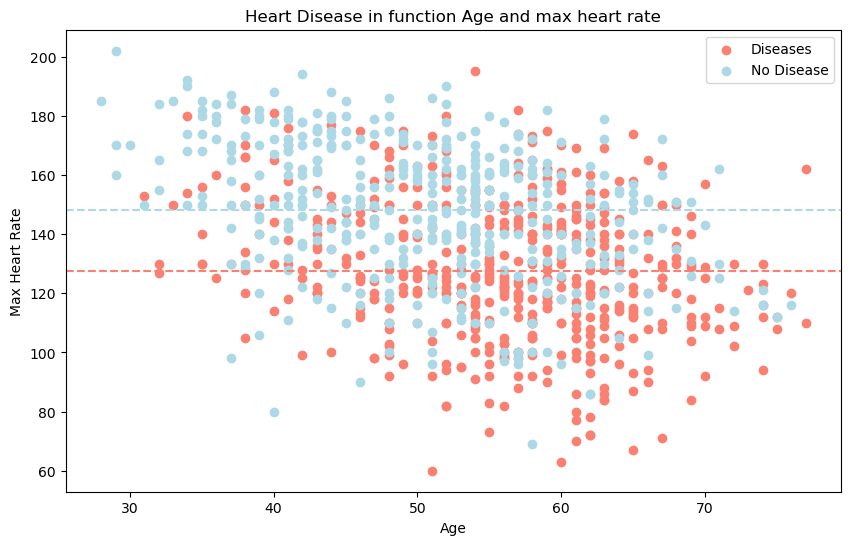

In [341]:
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.Age[df.HeartDisease == 1], 
             df.MaxHR[df.HeartDisease ==1], 
            c = "salmon", 
            ),
plt.scatter(df.Age[df.HeartDisease == 0], 
            df.MaxHR[df.HeartDisease == 0], 
            c = "lightblue"
            )
plt.axhline(y= df.MaxHR[df.HeartDisease == 0].mean() , color = "lightblue" , ls = "--");
plt.axhline(y= df.MaxHR[df.HeartDisease == 1].mean() , color = "salmon" , ls = "--");

#Add some helpful info
plt.title("Heart Disease in function Age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Diseases" , "No Disease"])

In [342]:
df.ChestPainType.value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

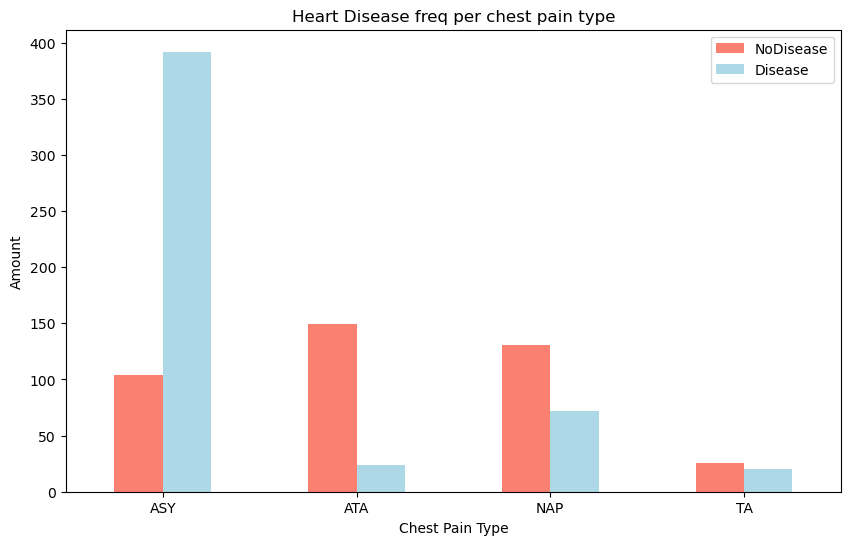

In [343]:
#Make the crosstab more visual
pd.crosstab(df.ChestPainType , df.HeartDisease).plot(kind="bar" , figsize=(10, 6) , color = ["salmon","lightblue"] );

plt.title("Heart Disease freq per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["NoDisease" , "Disease"]);
plt.xticks(rotation = 0);

### Balancing Class Distribution

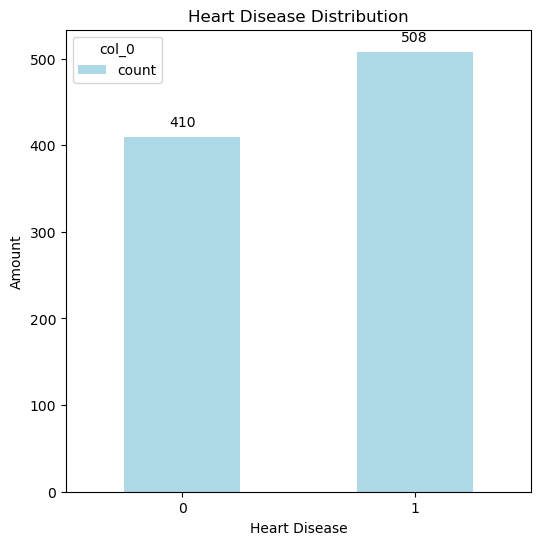

In [344]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
cross_tab_result = pd.crosstab(df.HeartDisease, columns='count')

# Plotting Heart Disease distribution
ax = cross_tab_result.plot(kind="bar", figsize=(6, 6), color="lightblue")

# Display counts on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show()



In [345]:
from imblearn.over_sampling import RandomOverSampler


# Assuming df is your DataFrame
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Instantiate the random over-sampler
ros = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='HeartDisease')], axis=1)


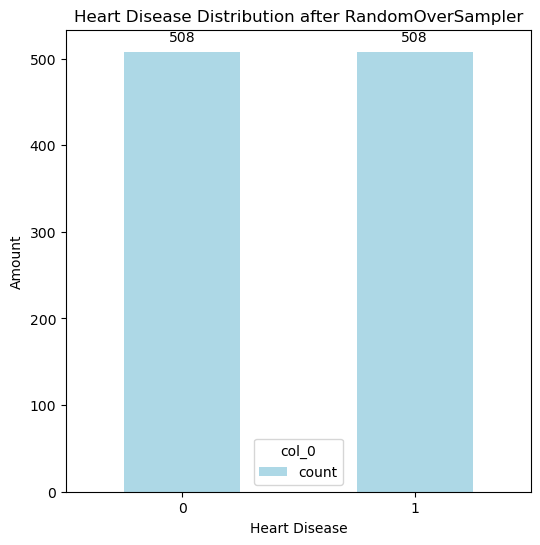

In [346]:
# Plotting Heart Disease distribution after oversampling
cross_tab_result_resampled = pd.crosstab(df_resampled['HeartDisease'], columns='count')

ax = cross_tab_result_resampled.plot(kind="bar", figsize=(6, 6), color="lightblue")

# Display counts on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Heart Disease Distribution after RandomOverSampler")
plt.xlabel("Heart Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show()

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [348]:
df.RestingECG.value_counts(
)

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [349]:
# Categorical --> Sex , ChestPainType , RestingECG ,  ExerciseAngina  , ST_Slope        
df_copy = df

### Handling Categorical Data
#### Encoding

In [350]:
# encode all the categorical features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#Encode Sex Feature
label_encoder.fit(df_copy["Sex"])
df_copy["Sex_en"] = label_encoder.fit_transform(df_copy["Sex"])
df_copy.drop("Sex",axis=1,inplace=True)

In [351]:
#Encode ChestPainType feature 
label_encoder.fit(df_copy["ChestPainType"])
df_copy["ChestPainType_en"] = label_encoder.fit_transform(df_copy["ChestPainType"])
df_copy.drop("ChestPainType",axis=1,inplace=True)
df_copy

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_en,ChestPainType_en
0,40,140,289,0,Normal,172,N,0.0,Up,0,1,1
1,49,160,180,0,Normal,156,N,1.0,Flat,1,0,2
2,37,130,283,0,ST,98,N,0.0,Up,0,1,1
3,48,138,214,0,Normal,108,Y,1.5,Flat,1,0,0
4,54,150,195,0,Normal,122,N,0.0,Up,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,Normal,132,N,1.2,Flat,1,1,3
914,68,144,193,1,Normal,141,N,3.4,Flat,1,1,0
915,57,130,131,0,Normal,115,Y,1.2,Flat,1,1,0
916,57,130,236,0,LVH,174,N,0.0,Flat,1,0,1


In [352]:
#Encode RestingECG feature 
label_encoder.fit(df_copy["RestingECG"])
df_copy["RestingECG_en"] = label_encoder.fit_transform(df_copy["RestingECG"])
df_copy.drop("RestingECG",axis=1,inplace=True)
df_copy

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_en,ChestPainType_en,RestingECG_en
0,40,140,289,0,172,N,0.0,Up,0,1,1,1
1,49,160,180,0,156,N,1.0,Flat,1,0,2,1
2,37,130,283,0,98,N,0.0,Up,0,1,1,2
3,48,138,214,0,108,Y,1.5,Flat,1,0,0,1
4,54,150,195,0,122,N,0.0,Up,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,N,1.2,Flat,1,1,3,1
914,68,144,193,1,141,N,3.4,Flat,1,1,0,1
915,57,130,131,0,115,Y,1.2,Flat,1,1,0,1
916,57,130,236,0,174,N,0.0,Flat,1,0,1,0


In [353]:
#Encode RestingECG feature 
label_encoder.fit(df_copy["ExerciseAngina"])
df_copy["ExerciseAngina_en"] = label_encoder.fit_transform(df_copy["ExerciseAngina"])
df_copy.drop("ExerciseAngina",axis=1,inplace=True)
df_copy

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_en,ChestPainType_en,RestingECG_en,ExerciseAngina_en
0,40,140,289,0,172,0.0,Up,0,1,1,1,0
1,49,160,180,0,156,1.0,Flat,1,0,2,1,0
2,37,130,283,0,98,0.0,Up,0,1,1,2,0
3,48,138,214,0,108,1.5,Flat,1,0,0,1,1
4,54,150,195,0,122,0.0,Up,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,Flat,1,1,3,1,0
914,68,144,193,1,141,3.4,Flat,1,1,0,1,0
915,57,130,131,0,115,1.2,Flat,1,1,0,1,1
916,57,130,236,0,174,0.0,Flat,1,0,1,0,0


In [354]:
#Encode RestingECG feature 
label_encoder.fit(df_copy["ST_Slope"])
df_copy["ST_Slope_en"] = label_encoder.fit_transform(df_copy["ST_Slope"])
df_copy.drop("ST_Slope",axis=1,inplace=True)
df_copy


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_en,ChestPainType_en,RestingECG_en,ExerciseAngina_en,ST_Slope_en
0,40,140,289,0,172,0.0,0,1,1,1,0,2
1,49,160,180,0,156,1.0,1,0,2,1,0,1
2,37,130,283,0,98,0.0,0,1,1,2,0,2
3,48,138,214,0,108,1.5,1,0,0,1,1,1
4,54,150,195,0,122,0.0,0,1,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,3,1,0,1
914,68,144,193,1,141,3.4,1,1,0,1,0,1
915,57,130,131,0,115,1.2,1,1,0,1,1,1
916,57,130,236,0,174,0.0,1,0,1,0,0,1


In [355]:
# Display the 420 to 447 rows
rows_420_to_427 = df.iloc[420:427]
print(rows_420_to_427)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
420   66        110          213          1     99      1.3             0   
421   66        120            0          0    120     -0.5             0   
422   65        150          236          1    105      0.0             1   
423   60        180            0          0    140      1.5             0   
424   60        120            0          1    141      2.0             1   
425   60        160          267          1    157      0.5             1   
426   56        126          166          0    140      0.0             0   

     Sex_en  ChestPainType_en  RestingECG_en  ExerciseAngina_en  ST_Slope_en  
420       1                 2              0                  1            1  
421       1                 2              2                  0            2  
422       1                 0              2                  1            1  
423       1                 2              2                  1    

#### Missing Data Handling
##### Impute missing values with the mean


In [356]:
# Replace zeros with NaN in the 'Cholesterol' column
df['Cholesterol'].replace(0, np.nan, inplace=True)

# Impute missing values with the mean
df['Cholesterol'].fillna(df['Cholesterol'].mean(), inplace=True)

In [357]:
# Display the 420 to 447 rows
rows_420_to_427 = df.iloc[420:427]
print(rows_420_to_427)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
420   66        110   213.000000          1     99      1.3             0   
421   66        120   244.635389          0    120     -0.5             0   
422   65        150   236.000000          1    105      0.0             1   
423   60        180   244.635389          0    140      1.5             0   
424   60        120   244.635389          1    141      2.0             1   
425   60        160   267.000000          1    157      0.5             1   
426   56        126   166.000000          0    140      0.0             0   

     Sex_en  ChestPainType_en  RestingECG_en  ExerciseAngina_en  ST_Slope_en  
420       1                 2              0                  1            1  
421       1                 2              2                  0            2  
422       1                 0              2                  1            1  
423       1                 2              2                  1    

In [358]:
### Make a corr_matrix 
df_copy.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_en,ChestPainType_en,RestingECG_en,ExerciseAngina_en,ST_Slope_en
Age,1.000000,0.254399,0.053373,0.198039,-0.382045,0.258612,0.282039,0.055750,-0.077150,-0.007484,0.215793,-0.268264
RestingBP,0.254399,1.000000,0.080723,0.070193,-0.112135,0.164803,0.107589,0.005133,-0.020647,0.022656,0.155101,-0.075162
Cholesterol,0.053373,0.080723,1.000000,0.043008,-0.017239,0.053029,0.094071,-0.101706,-0.092681,-0.063612,0.077549,-0.069723
FastingBS,0.198039,0.070193,0.043008,1.000000,-0.131438,0.052698,0.267291,0.120076,-0.073151,0.087050,0.060451,-0.175774
MaxHR,-0.382045,-0.112135,-0.017239,-0.131438,1.000000,-0.160691,-0.400421,-0.189186,0.289123,-0.179276,-0.370425,0.343419
Oldpeak,0.258612,0.164803,0.053029,0.052698,-0.160691,1.000000,0.403951,0.105734,-0.177377,-0.020438,0.408752,-0.501921
HeartDisease,0.282039,0.107589,0.094071,0.267291,-0.400421,0.403951,1.000000,0.305445,-0.386828,0.057384,0.494282,-0.558771
Sex_en,0.055750,0.005133,-0.101706,0.120076,-0.189186,0.105734,0.305445,1.000000,-0.126559,0.071552,0.190664,-0.150693
ChestPainType_en,-0.077150,-0.020647,-0.092681,-0.073151,0.289123,-0.177377,-0.386828,-0.126559,1.000000,-0.072537,-0.354727,0.213521
RestingECG_en,-0.007484,0.022656,-0.063612,0.087050,-0.179276,-0.020438,0.057384,0.071552,-0.072537,1.000000,0.077500,-0.006778


## correlation

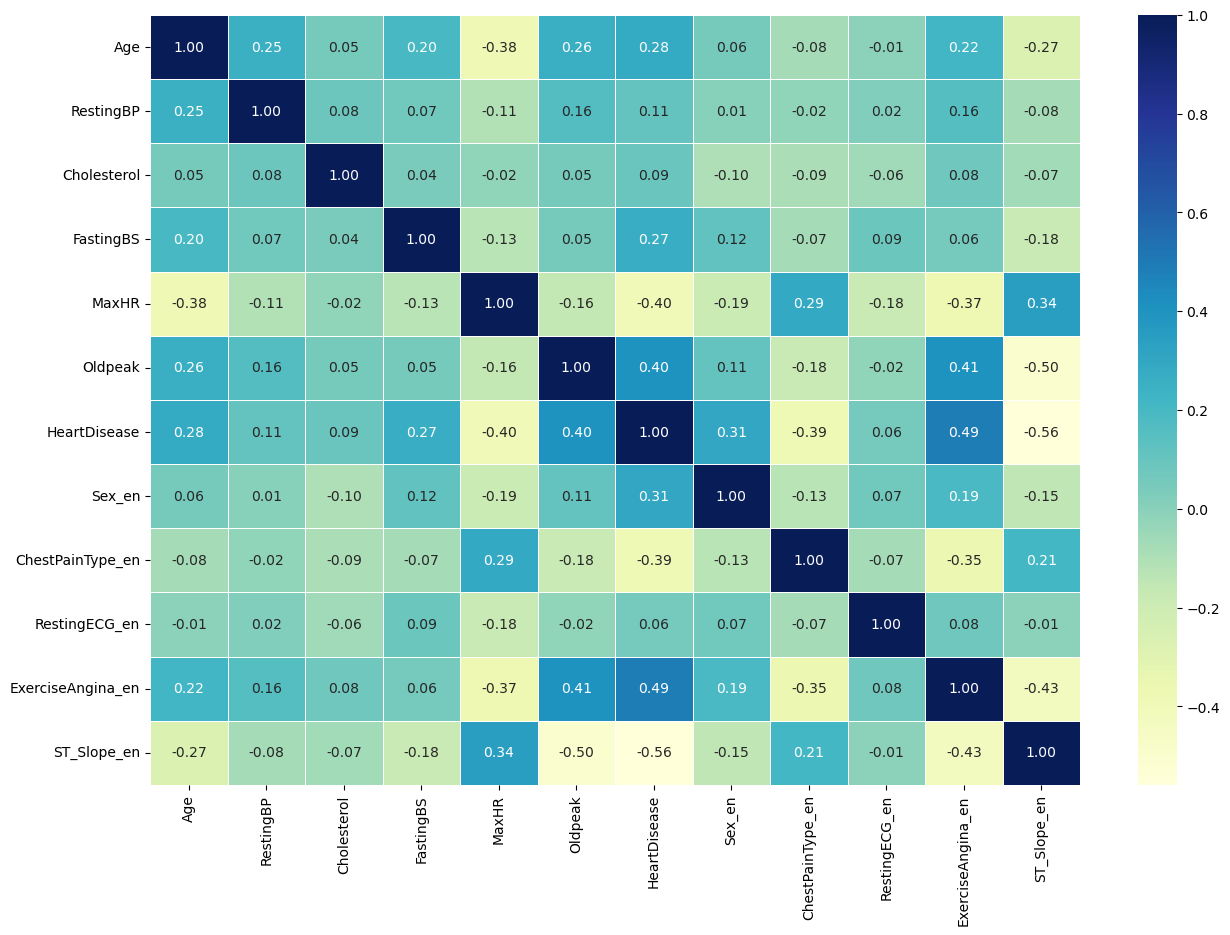

In [359]:
##Make our corr_matrix prettier
corr_mat = df.corr()
fig , ax = plt.subplots(figsize = (15 , 10))
ax = sns.heatmap(corr_mat , annot=True , linewidths=0.5 , fmt="0.2f" , cmap="YlGnBu")

In [360]:
#Splitting the data into train - test sets
x = df.drop('HeartDisease' , axis = 1)
y = df["HeartDisease"]
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 )

In [361]:
len(y_train), len(x_train) , len(y_test) , len(x_test)

(642, 642, 276, 276)

In [362]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}


# Make a function that fits and scores models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    model_scores = {}
    # Loop through the models
    for name, model in models.items():
        model.fit(x_train, y_train)
        # Evaluate
        model_scores[name] = model.score(x_test, y_test)
    return model_scores


In [363]:
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)
model_scores

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8442028985507246,
 'Random Forest': 0.8804347826086957}

<Axes: >

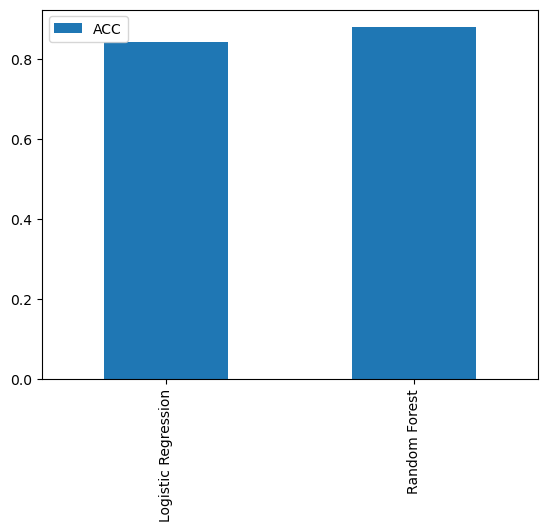

In [364]:
model_compare = pd.DataFrame(model_scores, index=["ACC"])
model_compare.T.plot.bar()

### Hyperparameter tuning 


####  Logistic Regression

In [365]:
# Define the hyperparameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200, 500]
}

In [366]:
# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression()

In [367]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [368]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best model
best_logreg_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_logreg_model.score(x_test, y_test)



c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = 

In [369]:
# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

print("Accuracy on Test Set:", test_accuracy)

Best Hyperparameters: {'C': 0.001, 'max_iter': 50, 'penalty': 'none', 'solver': 'newton-cg'}
Accuracy on Test Set: 0.8442028985507246


In [370]:
# Evaluate the best model on the train set
train_accuracy = best_logreg_model.score(x_train, y_train)

print("Accuracy on Train Set:", train_accuracy)

Accuracy on Train Set: 0.8504672897196262


In [371]:
# Assuming logreg_best is your best logistic regression model
predictions = best_logreg_model.predict(x_test)

In [372]:
# Getting confusion metrics for predictions
confusion_metrics = confusion_matrix(y_test, predictions)

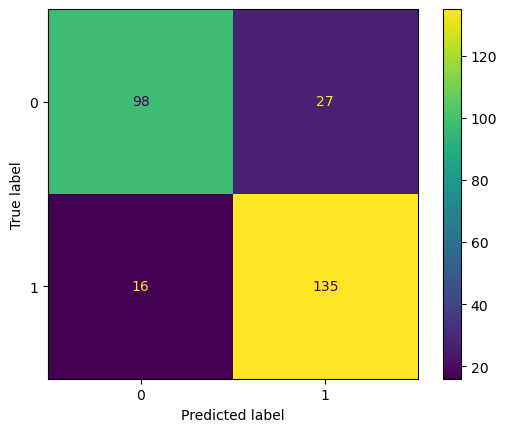

In [373]:
# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_metrics, display_labels=best_logreg_model.classes_)
disp.plot()

plt.show()

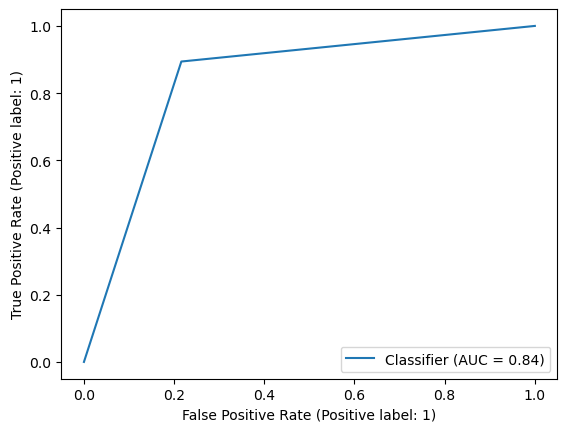

In [374]:
#Plotting ROC curve for predictions
confusion_metrics = RocCurveDisplay.from_predictions(y_test , predictions)

In [375]:
# Calculate precision, recall, and F1 score on the test set
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Print the results
print("Precision on Test Set:", precision)
print("Recall on Test Set:", recall)
print("F1 Score on Test Set:", f1)

Precision on Test Set: 0.8452517162471396
Recall on Test Set: 0.8442028985507246
F1 Score on Test Set: 0.8433552583527505


#### Random Forest


In [376]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

In [377]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [378]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
rf_test_accuracy = best_rf_model.score(x_test, y_test)


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1440 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
815 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Asus\anaconda3\Lib\site-packages\

In [379]:
# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

print("Accuracy on Test Set:", rf_test_accuracy)

Best Hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy on Test Set: 0.8768115942028986


In [380]:
# Evaluate the best model on the training set
rf_train_accuracy = best_rf_model.score(x_train, y_train)
print("Accuracy on Training Set:", rf_train_accuracy)

Accuracy on Training Set: 0.9236760124610592


In [381]:
predictions = best_rf_model.predict(x_test)

### Confusion Matrix (Random Forest)

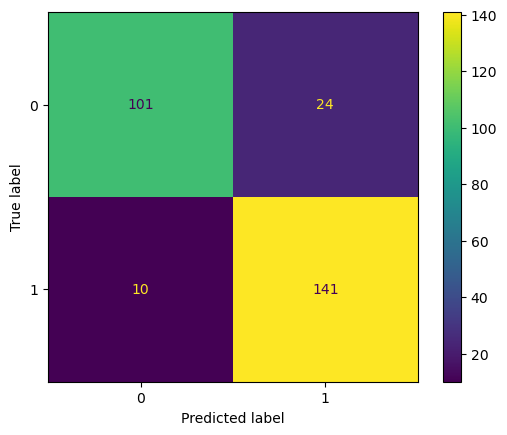

In [382]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot Confusion Matrix
disp_confusion = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_rf_model.classes_)
disp_confusion.plot()

plt.show()

### ROC Curve (Random Forest)

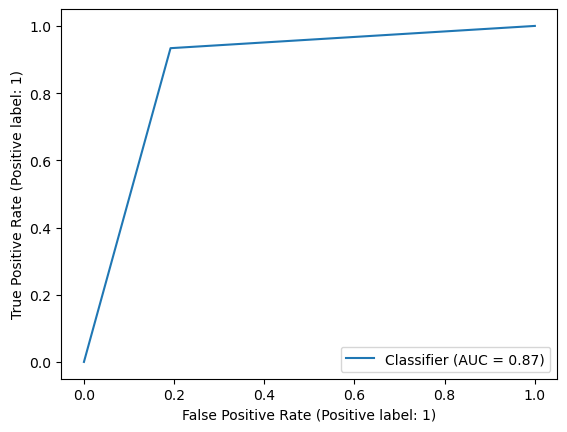

In [383]:
#Plotting ROC curve for the predictions
conf_metrics = RocCurveDisplay.from_predictions(y_test , predictions)

In [384]:
# Calculate precision, recall, and F1 score on the test set for Random Forest model
rf_precision = precision_score(y_test, predictions, average='weighted')
rf_recall = recall_score(y_test, predictions, average='weighted')
rf_f1 = f1_score(y_test, predictions, average='weighted')

# Print the results for Random Forest model
print("Precision on Test Set (Random Forest):", rf_precision)
print("Recall on Test Set (Random Forest):", rf_recall)
print("F1 Score on Test Set (Random Forest):", rf_f1)

Precision on Test Set (Random Forest): 0.8796199361416753
Recall on Test Set (Random Forest): 0.8768115942028986
F1 Score on Test Set (Random Forest): 0.8758865579010537


### Learning Curve for check Overfitting 

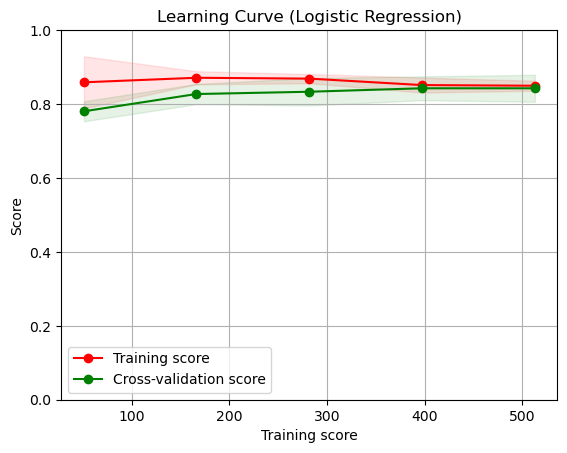

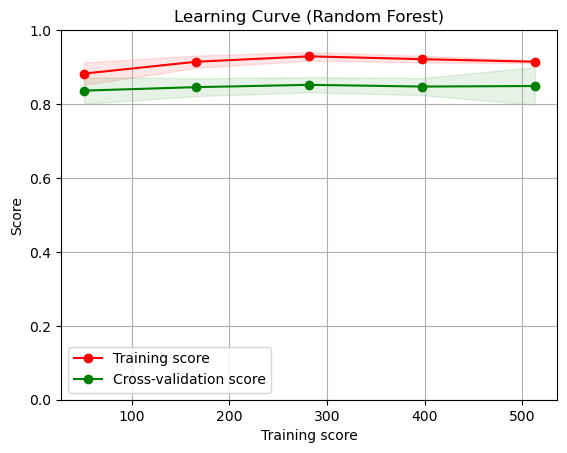

In [385]:
# Define a function to plot learning curves with y-axis scale 0 to 1
def plot_learning_curve_scaled(estimator, title, x, y, cv=None,
                                n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.ylim(0, 1)  # Set y-axis scale to 0-1
    plt.xlabel("Training score")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for Logistic Regression with y-axis scale 0-1
title = "Learning Curve (Logistic Regression)"
plot_learning_curve_scaled(best_logreg_model, title, x_train, y_train, cv=5, n_jobs=-1)
plt.show()

# Plot learning curve for Random Forest with y-axis scale 0-1
title = "Learning Curve (Random Forest)"
plot_learning_curve_scaled(best_rf_model, title, x_train, y_train, cv=5, n_jobs=-1)
plt.show()